# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Number of rows and columns in data
print("We have", df.shape[0], "rows and", df.shape[1], "columns.")

We have 1898 rows and 9 columns.


#### Observations:
There are 1898 entries/rows in our data file and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
df.info() # this method gives a good overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Our dataset has 9 columns with 3 possible data types: int, float, and object.

- columns with int data type:
1. order_id
2. customer_id
3. food_preparation_time
4. delivery_time

- columns with float data types:
1. cost_of_the_order

- columns with object data type:
1. restaurant_name
2. cuisine_type
3. day_of_the_week
4. rating

- We also see that all the columns have data values which are not null values.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Check if any null value
print(df.isna().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
- It appears that there are no missing values in all the 9 columns.
- So each of them have their entries filled upto the total number of rows: 1898


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Stats summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

**Using "food_preparation_time" column:**

We have the following summary after the food order is placed:

- minimum food prep time = 20.00 minutes
- average/mean food prep time = 27.37 minutes
- maximum food prep time = 35.00 minutes


### **Question 5:** How many orders are not rated?

In [ ]:
# The "rating" column has data type as object
#
print('The unique rating values are: ', df['rating'].unique(), '\n')
print('-'*50)
print('The rating counts for each unique rating are: \n')
print(df['rating'].value_counts())


The unique rating values are:  ['Not given' '5' '3' '4'] 

--------------------------------------------------
The rating counts for each unique rating are: 

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


In [ ]:
# We can replace 'Not given' values to the median of the 3, 4, 5, given ratings

# Replacing 'Not given' with NaN and converting ratings to float
df['rating'] = df['rating'].replace('Not given', np.nan).astype(float)


# Calculating the mean of the given numerical ratings (3, 4, and 5)
mean_rating = round(df['rating'].mean(), 1)

# Finally, replacing NaN values with the calculated mean
df['rating'] = df['rating'].fillna(mean_rating).astype(int)

print(df['rating'].value_counts())
print('-'*50)
print('datatype of rating column: ', df['rating'].dtype)
print('-'*50)
df.head()

rating
4    1122
5     588
3     188
Name: count, dtype: int64
--------------------------------------------------
datatype of rating column:  int64
--------------------------------------------------


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
From the above code output, the count of the 'Not given' rating represents how many order not rated:

- 736 ratings are not given
- so, there are 736 orders not rated

After Replacing values of 'Not given' with the rounded mean of the given values,
- We see that the datatype of the rating column is not int, and no longer object since we have suceessfully replaced the 'Not given' values to the mean.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# From the observation gotten using "df.info()", we can have numerical or categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns, '\n')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)


['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time'] 

['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']


#**Numerical Variables**

##order_id

total number of unique order_id is: 1898


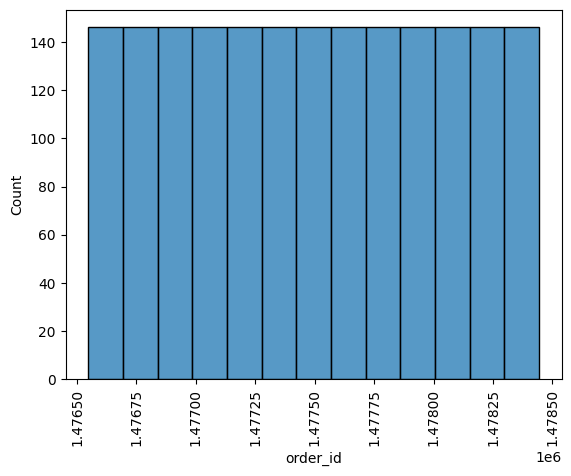

In [ ]:
# Unique components in the order_id column
print('total number of unique order_id is:', df['order_id'].nunique())

# Boxplot
sns.histplot(data=df,x='order_id')
plt.xticks(rotation=90)
plt.show()

###Observation:
- The total number of unique values in order_id is 1898, which is equal to the total number of rows in the dataset. This means all order_ids are different. So, we typically wouldn't need much analysis for this.

- The histogram plot indicate the the distribution of data in the order_id columns follows a uniform distribution because all histograms in the plot are of same height. So, each other would be equally likely.

##customer_id

In [ ]:
# Unique components in the customer_id column
print('total number of unique customer_id is:', df['customer_id'].nunique())

total number of unique customer_id is: 1200


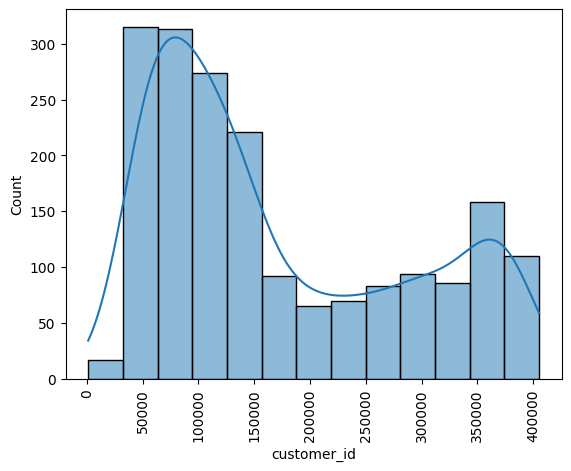

In [ ]:
# Histogram with KDE
ax = sns.histplot(data=df, x='customer_id', kde=True)
plt.xticks(rotation=90)  # Rotate x-axis ticks for clearer visualization
plt.show()


###observation:
- There are 1200 unique number of customer_ids, which means there are 1200 customers for the food hub company who buy food through their app.
- Each histogram bar shows the height of a range of 'customer_id' values within that range.
- On the histogram, the KDE helps to show a bimodal distribution of the number of orders made by each customer.
- The 1st mode (highest point on the KDE) is at around 300 counts which means a range of customers make about 300 orders. The 2nd mode shows that about 100 orders are made by a certain range of customers


##cost_of_the_order

In [ ]:
# Unique components in the food_preparation_time column
df['cost_of_the_order'].nunique()

312

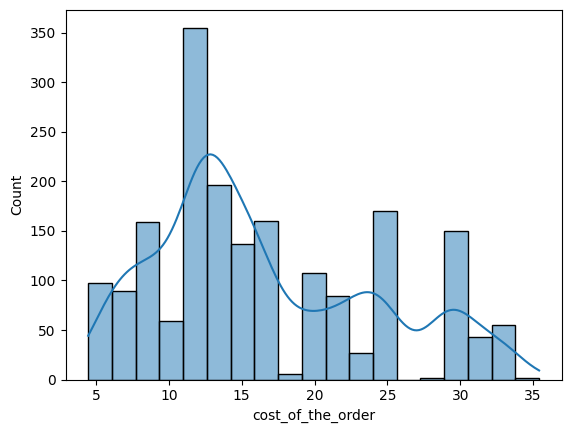

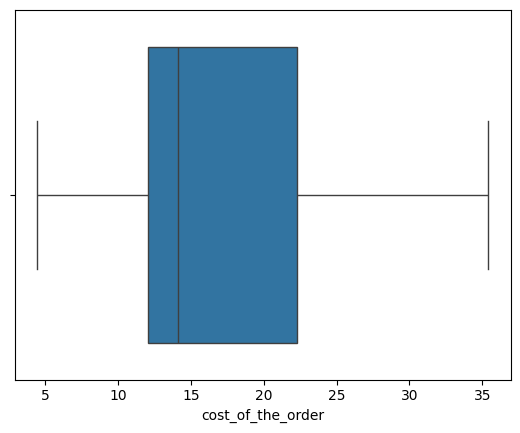

In [ ]:
# Histogram with KDE
ax = sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()

# Boxplot
ax = sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

###Observation:
- There are 312 unique cost of orders in the data.
- The histogram shows multimodal distribution with a strong peak around 12 dollars, which is the most common order cost. There are secondary peaks around 23 dollars and 30 dollars.
- The box in the boxplot shows asymmetry around the median of about 14 dollars, indicating a skew in the data which is in this case a right skew. Also, there are no outliers shown in this boxplot.

##food_preparation_time

In [ ]:
# Unique components in the food_preparation_time column
print( df['food_preparation_time'].unique())
print('\n')
total_unique_food_preparation_time = df['food_preparation_time'].nunique()
print('total number of unique prep time is:', total_unique_food_preparation_time)

[25 23 20 28 33 21 29 34 24 30 35 32 31 27 22 26]


total number of unique prep time is: 16


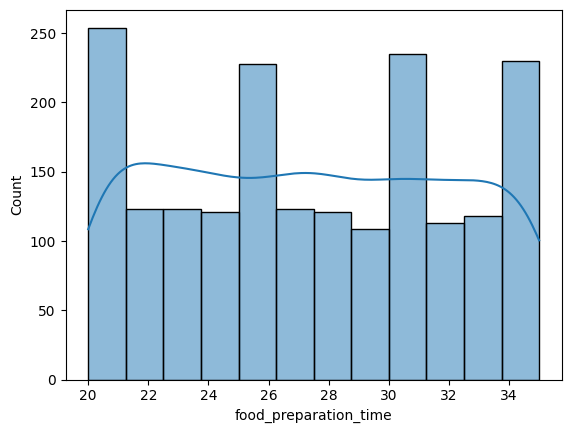

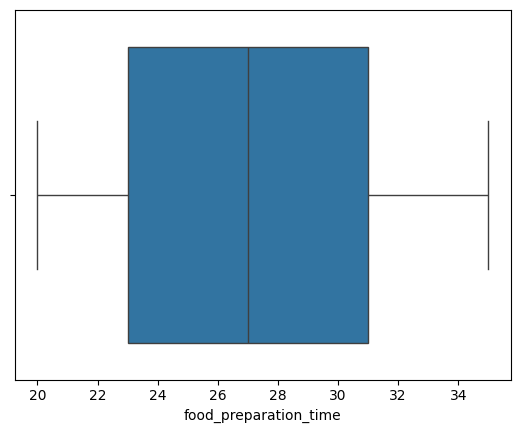

In [ ]:
# Histogram with KDE
ax = sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()

# Boxplot
ax = sns.boxplot(data=df, x='food_preparation_time')
plt.show()

###Observation
- There are 16 unique values for preparatime time for orders in this dataset
- The histogram, with the help of the KDE shows a distribution that approximates to a uniform distribution.
- The median seen in the boxplot is at around 27minutes, which appears to be well centered, without skewness or any outliers.

##delivery_time

In [ ]:
# Unique components in the delivery_time column
print( df['delivery_time'].unique())
print('\n')
total_unique_delivery_time = df['delivery_time'].nunique()
print('total number of unique delivery_time is:', total_unique_delivery_time)

[20 23 28 15 24 21 30 26 22 17 25 16 29 27 18 31 32 19 33]


total number of unique delivery_time is: 19


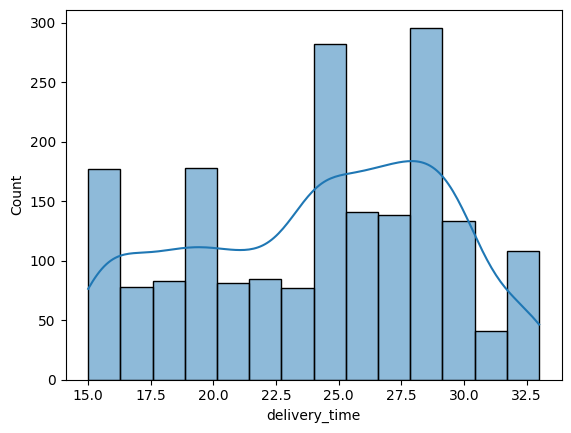

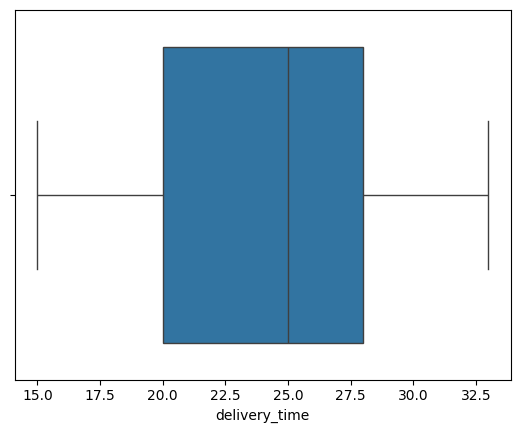

In [ ]:
# Histogram with KDE
ax = sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()

# Boxplot
ax = sns.boxplot(data=df, x='delivery_time')
plt.show()

###Observation
- There are 19 unique delivery times
- The KDE on the histogram plot helps us see a left skewness of the distribution of delivery times, with a prominent peak value of about 27.5 minutes.
- The boxplot shows a median of 25.0 minutes which is not at the center, showing a left skew. We don't see any outliers.

#**Categorical Variables**

##restaurant_name

In [ ]:
# Unique restaurants
df['restaurant_name'].nunique()

178

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


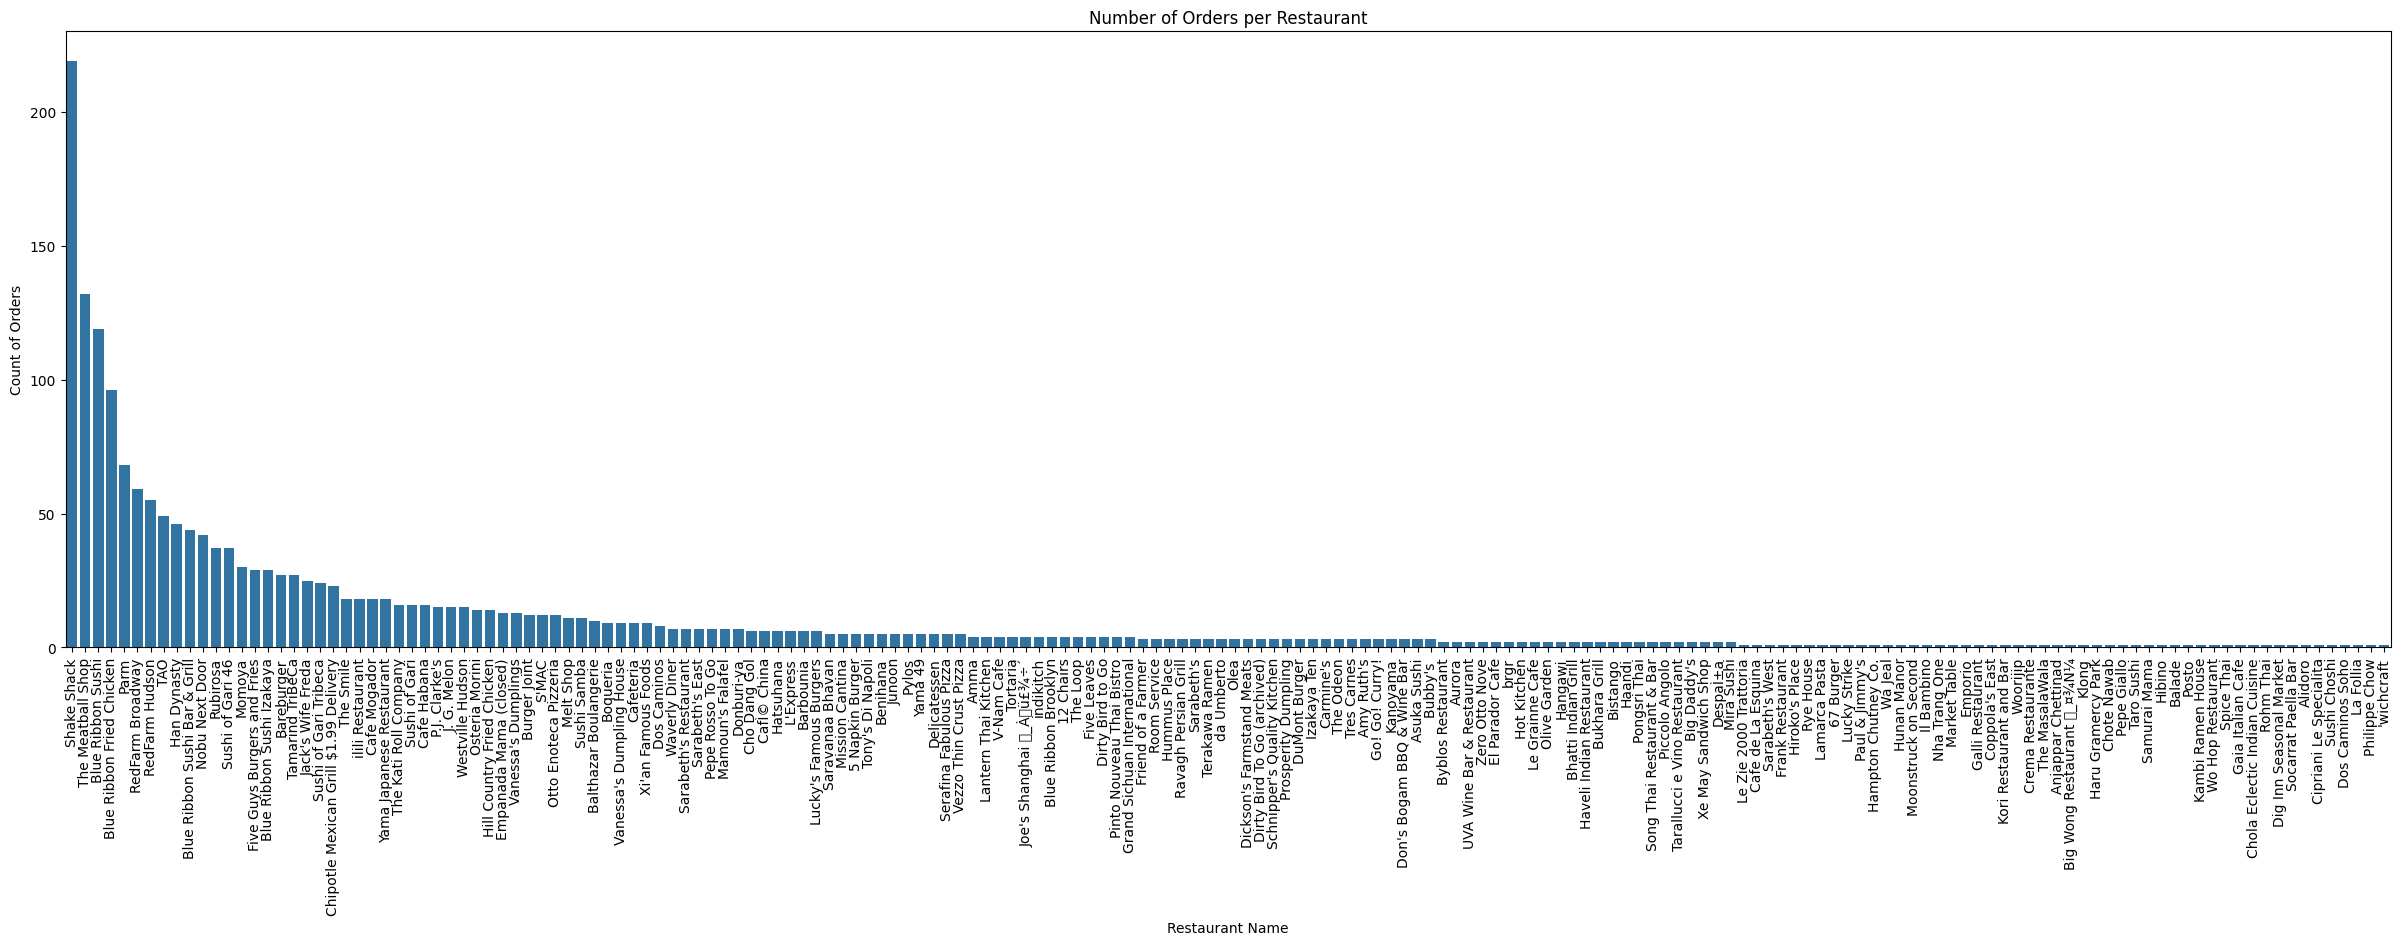

In [ ]:
plt.figure(figsize=(30, 8))
sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis ticks for clearer visualization
plt.title('Number of Orders per Restaurant')
plt.ylabel('Count of Orders')
plt.xlabel('Restaurant Name')
plt.show()

###Observation
- We have 178 restaurants in total
- the countplot/bargraph helps us to see the number of orders per restaurantes which can help us see which restaurantes are more famous than others: Shake Shark seem to have most number of orders (over 200), while the least on the graph is Wichcraft.

##cuisine_type

In [ ]:
# Unique restaurants
df['cuisine_type'].nunique()

14

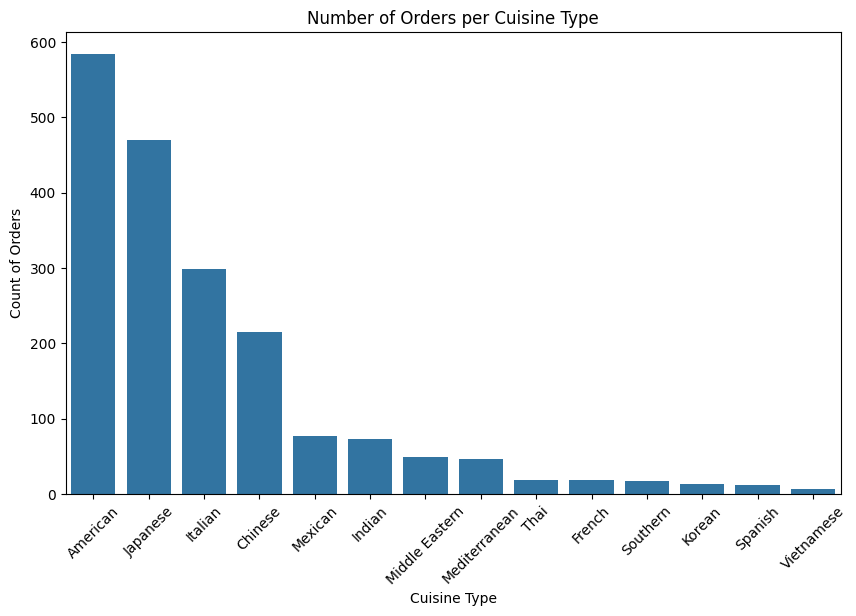

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Number of Orders per Cuisine Type')
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Count of Orders')
plt.show()

###Observation
- There are 14 cuisine types
- The countplot shows number of orders per type, which we can see that the most famous is the American and least is the Vietnamese cuisine.

###day_of_the_week

In [ ]:
# Unique restaurants
print(df['day_of_the_week'].unique())
print(df['day_of_the_week'].nunique())

['Weekend' 'Weekday']
2


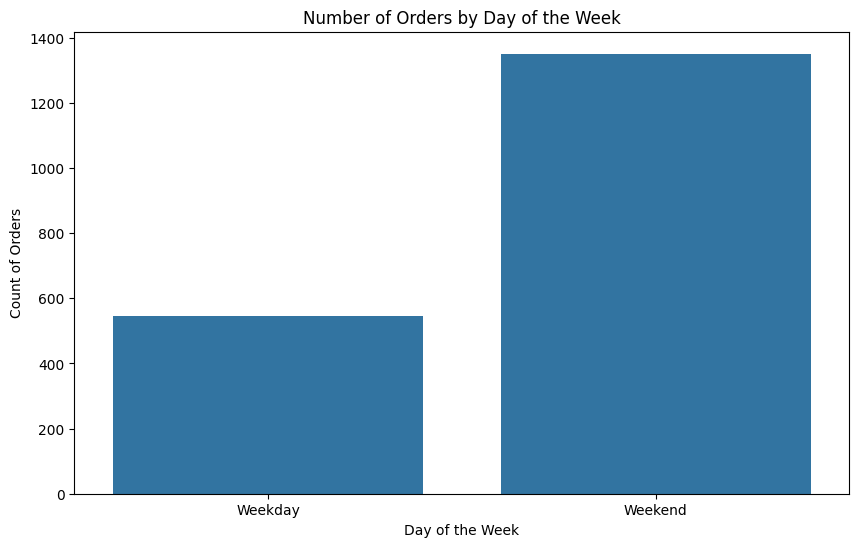

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_week', order=['Weekday', 'Weekend'])
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Orders')
plt.show()

###Observation
- Clearly, the two groups of day of the week bargraph show that weekends are more famous times with higher number of orders (close to 1400 orders) compared to weekdays with close to 600 orders

###rating

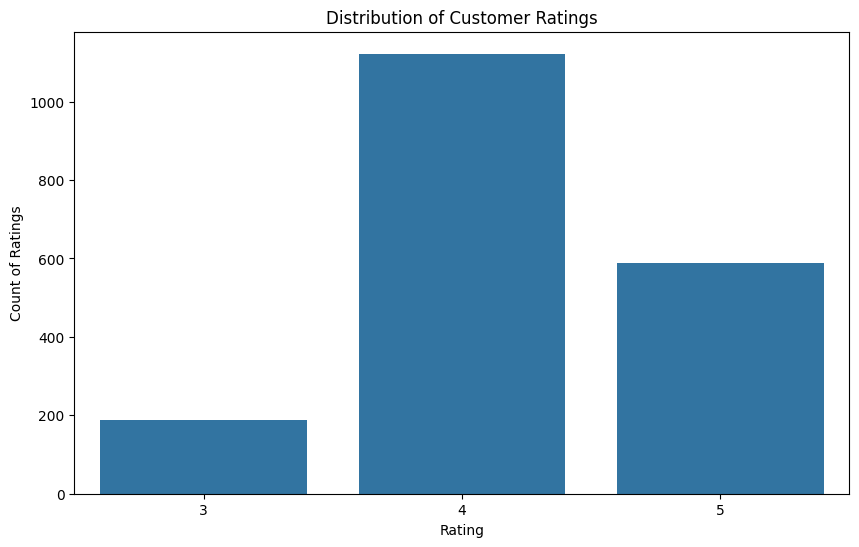

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=sorted(df['rating'].unique()))
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.show()

##Observation
- The countplot show that there are 3 groups of ratings: 3, 4, 5. Recall that 4 looks more prominent because we had replaced 'Not give' values to the rounded mean which is equal to 4.
- The '4' rating group is the one with the highest number of orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Grouping the data by 'restaurant_name' and counting the number of orders for each
order_counts = df.groupby('restaurant_name').size()

# Sorting the counts in descending order and getting the top 5
top_5_restaurants = order_counts.sort_values(ascending=False).head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64


#### Observations:
- Based on the number of orders, we see that the top 5 restaurantes are Shake Shark, The Meatball Shop, Blue RIbbon Sushi, Blue Ribbon Fried Chicken, and Parm.
- These are confirmed with the countplot restaurants name above.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Filtering DataFrame for entries on Weekend
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]

# Grouping by 'cuisine_type' and counting the number of orders for each type
cuisine_counts = weekend_data.groupby('cuisine_type').size()

# Getting the most popular cuisine by finding the maximum counts
most_popular_cuisine = cuisine_counts.idxmax()

print("The most popular cuisine on weekends is:", most_popular_cuisine, '\n')
cuisine_counts

The most popular cuisine on weekends is: American 



cuisine_type
American          415
Chinese           163
French             13
Indian             49
Italian           207
Japanese          335
Korean             11
Mediterranean      32
Mexican            53
Middle Eastern     32
Southern           11
Spanish            11
Thai               15
Vietnamese          4
dtype: int64

#### Observations:
- The most popular cusine on the weekends is the American with 415 orders on the weekends, slightly lower than the total orders of American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Counting the total number of orders
total_orders = len(df)

# Counting the number of orders that cost more than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Computing the percentage of orders above 20 dollars
percentage_above_20 = (orders_above_20 / total_orders) * 100

print('Percentage of orders above 20 dollars:', round(percentage_above_20, 2))

Percentage of orders above 20 dollars: 29.24


#### Observations:

- The percentage of orders above 20 dollars is at 29.24% which means most orders are less than this amount, so customers generally would buy more with orders less than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Mean delivery time
round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
- THe mean deivery time is about 24.16 minutes, while we saw earlier on the plots for delivery time that the median was about 25 minutes. So, it shows there's some skewness as we saw earlier.
- This mean time is the average number of time that an order is delivered.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
top_customers = df['customer_id'].value_counts().nlargest(3)

# Display the IDs of the top 3 most frequent customers and the number of orders they placed
print("IDs of the top 3 most frequent customers and the number of orders they placed: \n")
print(top_customers)

IDs of the top 3 most frequent customers and the number of orders they placed: 

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
- The top 3 customers made 13, 10, 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

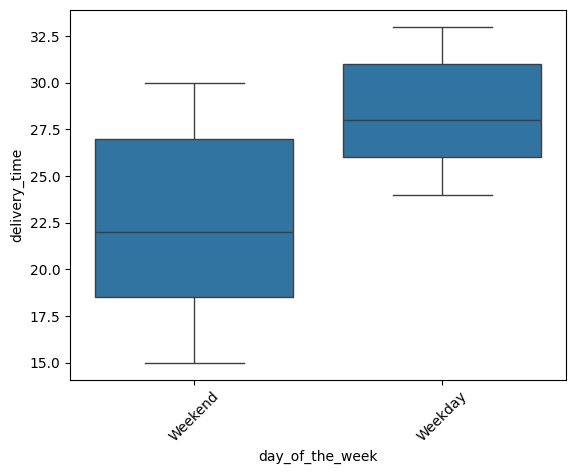

In [ ]:
# boxplot
# 'delivery time' and 'day of the week'
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.xticks(rotation=45)
plt.show()

##Observation: Delivery Time across Day of the Week
- The median delivery time on weekends (about 22 minutes) is lower than on weekdays (about 28 minutes).
- Delivery times are more consistent on weekdays, with a tighter interquartile range.

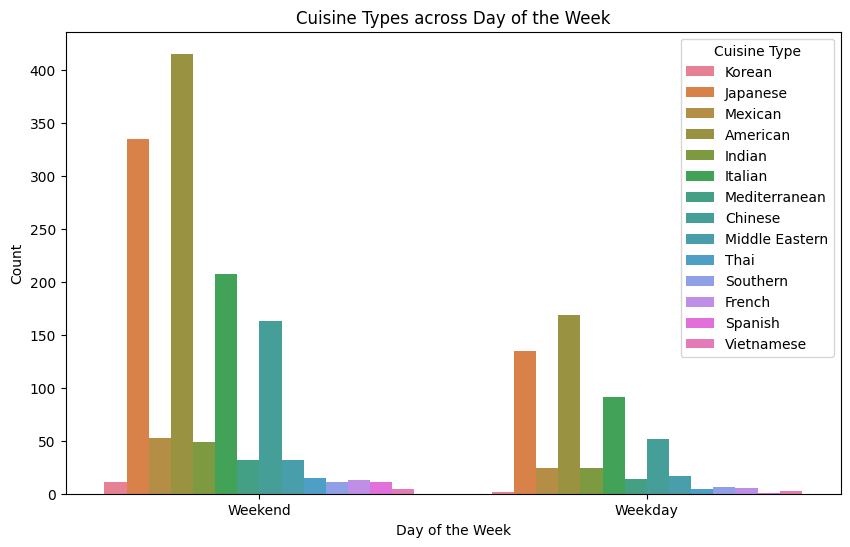

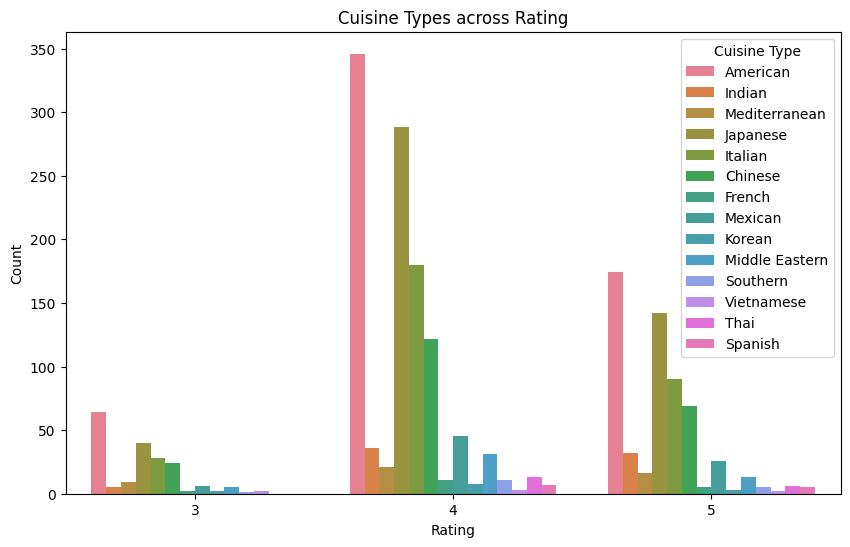

In [ ]:
# countplot/bar graph:
# cuisine types across day_of_the_week

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_week', hue='cuisine_type')
plt.title('Cuisine Types across Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Cuisine Type')
plt.show()

# countplot/bar graph:
# Compare cuisine types across rating

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='cuisine_type')
plt.title('Cuisine Types across Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Cuisine Type')
plt.show()



##Observation: cuisine types across day_of_the_week
- American, Japanese, and Italian cuisines are the most popular on weekends.
- The distribution of cuisine types is similar on weekdays, but Korean seems to be very low during the weekday than weekends.
- Generally, there are fewer orders on weekends compared to weekdays.

##Observation: Cuisine Types across Ratings
- American cuisine has the highest number of orders with higher ratings.
- There's a similar trend of which type has the highest and lowest rating across all the various rating values (3, 4, 5).
- Lowest rated types are: Thai, Spanish, Vietnamese, Southern, Korean, etc.

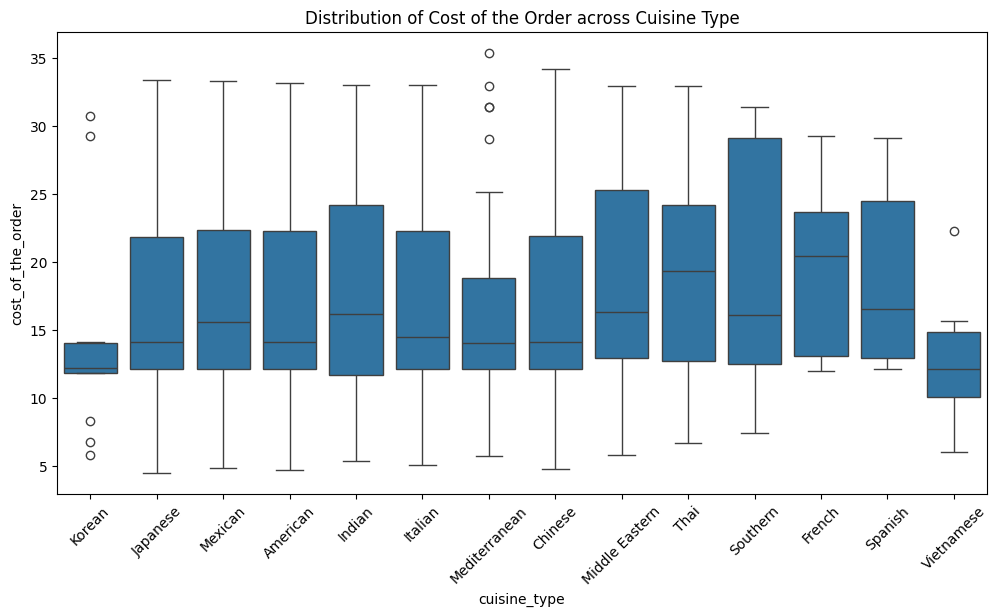

In [ ]:
# Boxplot
# cost_of_the_order across cuisine_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Distribution of Cost of the Order across Cuisine Type')
plt.xticks(rotation=45)
plt.show()


##Observation: Cost of order vs cuisine type

- There are a few outliers in the cost of orders, especially for Japanese and Mexican cuisines for Korean, Mediterranean, and Vietnamese.
- The types with median higher cost in decreasing order are: French, Thai, Indian, Middle Eastern, Mexican, etc.
- Generally, those with lower costs are: Chinese, Mediterranean, American, Japanese, Korean, Vietnamese

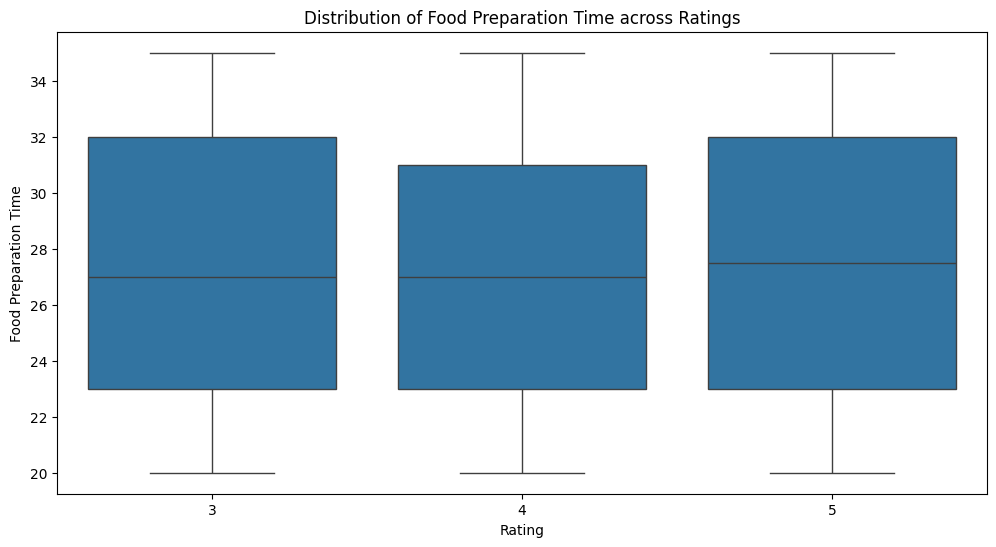

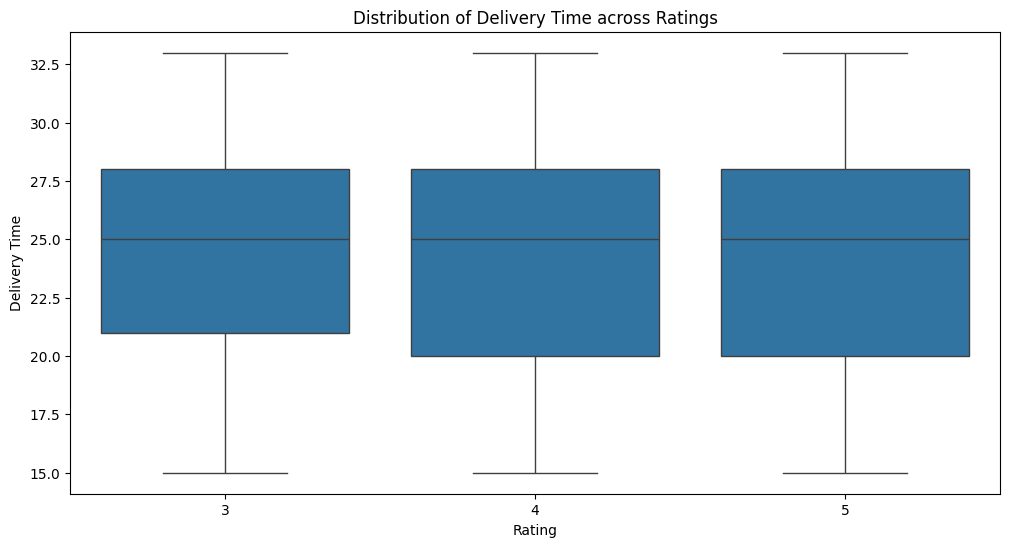

In [ ]:
# Boxplot
# food_preparation_time across ratings

plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='food_preparation_time', data=df)
plt.title('Distribution of Food Preparation Time across Ratings')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()

# Boxplot
# delivery_time across ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='delivery_time', data=df)
plt.title('Distribution of Delivery Time across Ratings')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

##Observation: Food Preparation Time across Ratings
- The food preparation time is relatively similar across different ratings, with no significant differences. Common median of 27 minutes.
- The interquartile range of food preparation times is similar for rating 3 and 5 which are both slightly wider than that of rating 4.
- No outliers are present.

##Observation: Delivery Time across Ratings
- Delivery times are consistent across different ratings, with similar medians and interquartile ranges. Common median of 25 minutes.
- There is no significant difference in delivery times for orders with ratings of 3, 4, or 5.
- There are no outliers in delivery times across all ratings.

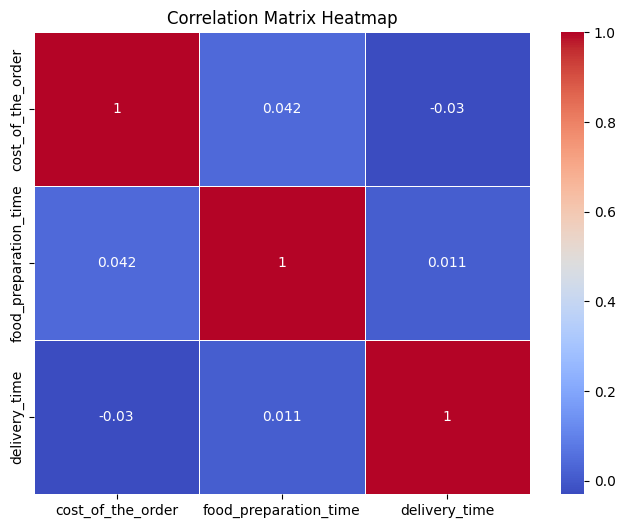

In [ ]:
# Selecting numerical features for correlation matrix
numerical_features = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Creating the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##Observation: Correlation Matrix
- There are generally weak correlations between cost of the order, food preparation time, and delivery time.
- There is a slight positive correlation between the cost of the order and food preparation time.
- A slight negative correlation exists between the cost of the order and delivery time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
print(df['rating'].unique())

# Converting non-numeric entries in 'rating' to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df.dropna(subset=['rating'], inplace=True)

# grouping by 'restaurant_name', filtering groups, and calculating the mean rating
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# more than 50 ratings and an average rating greater than 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Printing eligible restaurants
print("Restaurants eligible for promotional offers:")
print(eligible_restaurants)

[4 5 3]
Restaurants eligible for promotional offers:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     96  4.218750
Blue Ribbon Sushi            119  4.134454
Parm                          68  4.073529
RedFarm Broadway              59  4.169492
RedFarm Hudson                55  4.109091
Shake Shack                  219  4.168950
The Meatball Shop            132  4.325758


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Calculating the company revenue based on the cost condition
conditions = [
    (df['cost_of_the_order'] > 20),
    (df['cost_of_the_order'] > 5)
]
choices = [
    df['cost_of_the_order'] * 0.25,
    df['cost_of_the_order'] * 0.15
]
df['revenue'] = np.select(conditions, choices, default=0)

# Total revenue
total_revenue = df['revenue'].sum()
print("Total net revenue generated by the company:", total_revenue)


Total net revenue generated by the company: 6166.303


#### Observations:
- Based on the conditions, the net revenue of Foodhub is 6166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_over_60 = df[df['total_time'] > 60].shape[0]
percentage_over_60 = (orders_over_60 / len(df)) * 100

print("Percentage of orders taking more than 60 minutes:", percentage_over_60)

Percentage of orders taking more than 60 minutes: 10.537407797681771


#### Observations:
- This calculations show that the orders above 60 minutes are only about 10.5%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
df['weekend'] = df['day_of_the_week'].isin(['Weekend'])
mean_weekday_time = df[df['weekend'] == False]['delivery_time'].mean()
mean_weekend_time = df[df['weekend'] == True]['delivery_time'].mean()

# Displaying the mean delivery times
print("Mean delivery time on weekdays:", mean_weekday_time)
print("Mean delivery time on weekends:", mean_weekend_time)

Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


#### Observations:
- This shows that on weekdays, delivery times are longer at about 28.34 minutes compared to weekends with about 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
Order Costs and Delivery Times:
- The median delivery time on weekends (22 minutes) is lower than on weekdays (28 minutes).
- Orders costing more than $20 constitute only 29.24% of the total orders, indicating most customers prefer orders below this amount.

Cuisine Popularity and Ratings:
- American cuisine is the most popular, followed by Japanese.
- Higher ratings are associated with American cuisine, while lower-rated orders include Thai, Spanish, Vietnamese, and Southern cuisines.
- The top 5 restaurants in terms of order volume are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

Food Preparation and Delivery Efficiency:
- The mean food preparation time is 27.37 minutes, with a median value of around 27 minutes.
- The delivery time shows a left-skewed distribution, with a median of 25 minutes and a mean of 24.16 minutes.
- Only 10.5% of orders take more than 60 minutes from preparation to delivery.
- The delivery times and preparation times seem not to have lower ratings since for all ratings, the median was same.

Customer Engagement and Revenue:
- The top 3 customers placed 13, 10, and 9 orders, respectively, indicating high engagement from a few key customers.
- The net revenue generated is $6166.30 "given that the company charges the restaurant 25% on the orders costing more than 20 dollars and 15% on the orders costing more than 5 dollars."
- The mean delivery time on weekdays is 28.34 minutes, while on weekends it is 22.47 minutes

### Recommendations:

* Enhance Customer Engagement: To increase the rate and utility of feedback, incentivize ratings with discounts or loyalty points to gain more actionable insights from customers' post-order experiences.

* Focus on High-Performing restaurantes: Given the dominance of certain restaurants and cuisines, consider promoting these more aggressively while also exploring why less popular cuisines aren't performing as well. Tailored marketing campaigns or featuring underrepresented cuisines in promotions could broaden customer choices and satisfaction.

* Address Time Delays: For orders taking over 60 minutes, investigate the underlying causes — whether they pertain to specific cuisine types, restaurants, or times of day — and implement targeted improvements in logistics or partnerships.

####Improving Delivery Efficiency:

- Focus on Weekdays: Since delivery times are longer on weekdays, consider strategies to improve delivery efficiency during these times. This could include optimizing delivery routes or increasing the number of delivery personnel.

- Monitor and Improve Low-Performing Restaurants: Restaurants with lower ratings, such as Thai, Southern, and Vietnamese, should be monitored closely. Providing feedback and support to these restaurants could help improve their performance.

####Promotional Strategies:

- Target Popular and High-Rated Restaurants: Promotions should focus on popular and high-rated cuisines and restaurants, such as American cuisine and the top 5 restaurants. This can help boost customer satisfaction and choices.

- Weekend Promotions: Since weekends have higher order volumes, consider offering weekend-specific promotions to further make business on the increased demand during these days.

####Customer Engagement:

- Reward Top Customers: Continue to implement a loyalty program to reward the top customers, such as offering discounts or special offers to encourage continued engagement and increase order frequency.
- Encourage Feedback: Encourage more customers to rate their orders by offering small incentives for providing feedback. This will help gather more data on customer preferences and identify areas for improvement.

####Cost Management:
- Menu Optimization: Look further into the between cost of orders and cuisine types. Focus on optimizing menus to ensure that popular items remain affordable while maintaining profitability.

####Operational Improvements:
- The data showed ratings were same when plotted with the delivery times and when plotted with the preparatory times, suggesting that there's not much difference. So, similar times should be maintained or improved if possible.



---